In [ ]:
#Three Observations:
#1.  Average tumor volumes range from a low of 40.2 (Ramicane Drug Regimen) to a high of 55.2 (Ketapril Drug Regimen).
#2.  There is an equal distribution of male and female mice in the study overall.
#3.  There is a strong, positive correlation between mouse weight and the average tumor volume for the Capomulin Drug Regimen.

In [2]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [3]:
#Read in data
mouse_data_path = "Resources/mouse_metadata.csv"
study_data_path = "Resources/study_results.csv"

mouse_data = pd.read_csv(mouse_data_path)
study_data = pd.read_csv(study_data_path)

In [4]:
#Merge the two datasets
mouse_comb = pd.merge(mouse_data, study_data, on="Mouse ID")

In [5]:
#Identify duplicate mice - the only duplicate one is Mouse ID g989
DupRowsDF = mouse_comb[mouse_comb.duplicated(["Mouse ID", "Timepoint"])]
DupRowsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
#Show only Mouse ID g989 to see the duplicate rows
only_g989 = mouse_comb.loc[mouse_comb["Mouse ID"] == "g989", :]
only_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
#Drop duplicate rows for Mouse ID & Timepoint; this keeps the first instance
mouse_comb_nodup = mouse_comb.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [8]:
#Check Mouse ID g989 to confirm duplicates have been removed
check_only_g989 = mouse_comb_nodup.loc[mouse_comb_nodup["Mouse ID"] == "g989", :]
check_only_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [9]:
#Generate a summary statistics table of mean, median, var, std, and SEM of the tumor volumes for each regimen
tumor_stats = mouse_comb_nodup.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
tumor_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [10]:
#Bar Plots:  number of mice per time point for each drug regimen throughout the course of the study

#Prepare data for plots
#Dataset with count of mice across all timepoints by drug group
mgroup = mouse_comb_nodup.groupby(["Drug Regimen"])["Mouse ID"].count().reset_index()

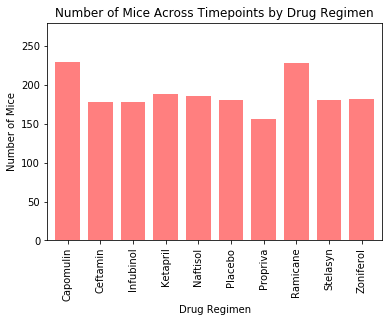

In [11]:
#Bar plot using pandas
dgroup = mgroup.set_index("Drug Regimen")
dgroup.plot(kind="bar", width=0.75, color='red', alpha=0.5, legend=False,
            ylim=(0, max(dgroup["Mouse ID"]+50))).set(ylabel="Number of Mice")
plt.title("Number of Mice Across Timepoints by Drug Regimen")
plt.show()

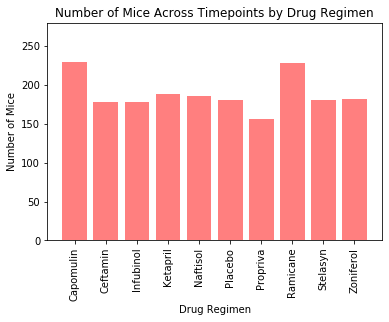

In [12]:
#Bar plot using pyplot
dgrp = np.array(mgroup["Drug Regimen"].tolist())
mcnt = np.array(mgroup["Mouse ID"].tolist())
x_axis = np.arange(len(dgrp))
plt.bar(x_axis, mcnt, color = 'r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, dgrp, rotation=90)
plt.ylim(0, max(mcnt)+50)
plt.title("Number of Mice Across Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

In [13]:
#Pie plots to show distribution of gender

#Prepare data to use for plots
gender_df = mouse_comb_nodup[["Mouse ID", "Sex"]]
gender_nodup_df = gender_df.drop_duplicates(["Mouse ID", "Sex"])
gender_group = gender_nodup_df.groupby(["Sex"])
gen_cnt = gender_group["Sex"].count()

gen_df = pd.DataFrame({"Count": gen_cnt})

gender = np.array(gen_df["Count"].tolist())

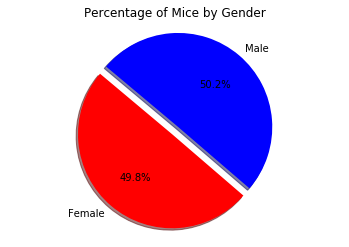

In [15]:
#Pie plot using pyplot
labels = ["Female", "Male"]
colors = ["red", "blue"]
explode = (0.1, 0)
plt.pie(gender, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Percentage of Mice by Gender")
plt.show()

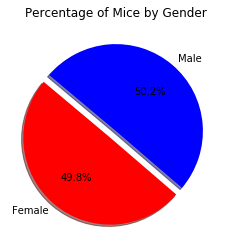

In [16]:
#Pie plot using pandas
plot = gen_df.plot(kind="pie", y="Count", legend=False, autopct='%1.1f%%', startangle=140, title="Percentage of Mice by Gender",
                  shadow=True, explode=(0.1,0), colors=colors)
plot.set_ylabel('')
plt.show()

In [17]:
#Quartiles, Outliers and Boxplots

#Create data set with final tumor volume for each mouse by drug regimen
subset = mouse_comb_nodup[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
subset_group = subset.groupby(["Drug Regimen", "Mouse ID"]).tail(1).sort_values("Drug Regimen").reset_index(drop=True)
#Keep only the four drug groups of interest
drug_group_subset = subset_group.loc[(subset_group["Drug Regimen"] == "Capomulin") |
                                    (subset_group["Drug Regimen"] == "Ramicane") |
                                    (subset_group["Drug Regimen"] == "Infubinol") |
                                    (subset_group["Drug Regimen"] == "Ceftamin")]

In [18]:
#Quartiles and outliers across the four drug groups of interest (combined)
tumor_vol = drug_group_subset["Tumor Volume (mm3)"]

t_quartiles = tumor_vol.quantile([0.25,0.5,0.75])
t_lowerq = t_quartiles[0.25]
t_upperq = t_quartiles[0.75]
t_iqr = round((t_upperq - t_lowerq),2)
t_lower_bound = round((t_lowerq - (1.5*t_iqr)),2)
t_upper_bound = round((t_upperq + (1.5*t_iqr)),2)

outliers = drug_group_subset.loc[(drug_group_subset["Tumor Volume (mm3)"] < t_lower_bound) | 
                                  (drug_group_subset["Tumor Volume (mm3)"] > t_upper_bound)]
outlier_cnt = outliers["Tumor Volume (mm3)"].count()

print(f"The interquartile range of tumor values is: {t_iqr}")
print(f"Values below {t_lower_bound} could be outliers.")
print(f"Values above {t_upper_bound} could be outliers.")
print(f"The number of potential outliers is: {outlier_cnt}")
if outlier_cnt > 0:
    print(outliers)

The interquartile range of tumor values is: 22.74
Values below 3.08 could be outliers.
Values above 94.04 could be outliers.
The number of potential outliers is: 0


In [19]:
#Since making individual boxplots below, also calculating quartiles and outliers for each of the four drug regimens of interest
#as the quartiles and potentials outliers being plotted will be different than the combined group
drug_groups = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#make a for loop to go through the four drug groups
for grp in drug_groups:
 grp_group = subset_group.loc[subset_group["Drug Regimen"] == grp, ["Mouse ID", "Tumor Volume (mm3)"]].set_index("Mouse ID")
 tumors_grp = grp_group["Tumor Volume (mm3)"]
 quartiles = tumors_grp.quantile([0.25,0.5,0.75])
 lowerq = quartiles[0.25]
 upperq = quartiles[0.75]
 iqr = round((upperq - lowerq),2)
 lower_bound = round((lowerq - (1.5*iqr)),2)
 upper_bound = round((upperq + (1.5*iqr)),2)
 
 outlier_group = grp_group.loc[(grp_group["Tumor Volume (mm3)"] < lower_bound) | 
                                  (grp_group["Tumor Volume (mm3)"] > upper_bound)]
 count = outlier_group["Tumor Volume (mm3)"].count()

 print(f"{grp} Drug Regimen:")
 print(f"  The interquartile range of tumor values is: {iqr}")
 print(f"  Values below {lower_bound} could be outliers.")
 print(f"  Values above {upper_bound} could be outliers.")
 print(f"  The {grp} drug regimen has {count} potential outliers.")
 print("")
    
 if count > 0:
        print(outlier_group)
        print("")
 print("")

Capomulin Drug Regimen:
  The interquartile range of tumor values is: 7.78
  Values below 20.71 could be outliers.
  Values above 51.83 could be outliers.
  The Capomulin drug regimen has 0 potential outliers.


Ramicane Drug Regimen:
  The interquartile range of tumor values is: 9.1
  Values below 17.91 could be outliers.
  Values above 54.31 could be outliers.
  The Ramicane drug regimen has 0 potential outliers.


Infubinol Drug Regimen:
  The interquartile range of tumor values is: 11.48
  Values below 36.83 could be outliers.
  Values above 82.75 could be outliers.
  The Infubinol drug regimen has 1 potential outliers.

          Tumor Volume (mm3)
Mouse ID                    
c326               36.321346


Ceftamin Drug Regimen:
  The interquartile range of tumor values is: 15.58
  Values below 25.35 could be outliers.
  Values above 87.67 could be outliers.
  The Ceftamin drug regimen has 0 potential outliers.




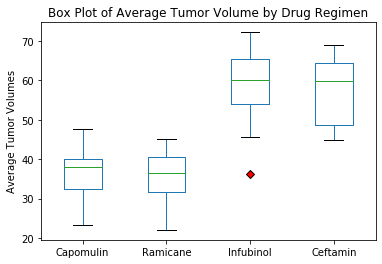

In [20]:
#Box plots for each of the four drug regimens of interest
#Set up data for plots
Cap_group = subset_group.loc[subset_group["Drug Regimen"] == "Capomulin", ["Tumor Volume (mm3)"]]
Cap_tumors = Cap_group["Tumor Volume (mm3)"].tolist()

Ram_group = subset_group.loc[subset_group["Drug Regimen"] == "Ramicane", ["Tumor Volume (mm3)"]]
Ram_tumors = Ram_group["Tumor Volume (mm3)"].tolist()

Inf_group = subset_group.loc[subset_group["Drug Regimen"] == "Infubinol", ["Tumor Volume (mm3)"]]
Inf_tumors = Inf_group["Tumor Volume (mm3)"].tolist()

Cef_group = subset_group.loc[subset_group["Drug Regimen"] == "Ceftamin", ["Tumor Volume (mm3)"]]
Cef_tumors = Cef_group["Tumor Volume (mm3)"].tolist()

tumor_df = pd.DataFrame({"Capomulin": Cap_tumors, "Ramicane": Ram_tumors, "Infubinol": Inf_tumors, "Ceftamin": Cef_tumors})

#Box plots
red_diamond = dict(markerfacecolor='r', marker='D')
tumor_df.boxplot(column=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], grid=False, flierprops=red_diamond)
plt.title("Box Plot of Average Tumor Volume by Drug Regimen")
plt.ylabel("Average Tumor Volumes")
plt.show()

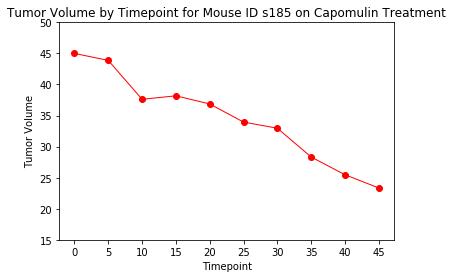

In [21]:
#Line Plot:  single mouse treated with Capomulin

#Create subset data for a single mouse treated with Capomulin
subset1 = mouse_comb_nodup[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
Cap_Mse = subset1.loc[(subset1["Drug Regimen"] == "Capomulin") & (subset1["Mouse ID"] == "s185"), :]

#Create line plot
timepoint = Cap_Mse.iloc[:,2]
tumor_vol = Cap_Mse.iloc[:,3]
x_axis = np.arange(len(timepoint))
plt.plot(x_axis, tumor_vol, color="red", marker="o", linewidth=1)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Timepoint for Mouse ID s185 on Capomulin Treatment")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoint)
plt.ylim(15, 50)
plt.show()

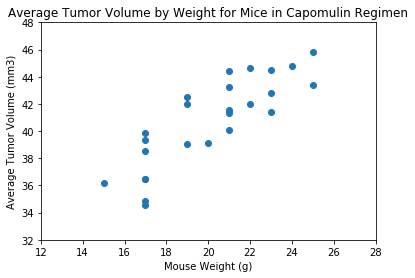

In [22]:
#Scatter Plot:  mouse weight vs average tumor volume for mice in Capomulin drug regimen

#Create dataset for mice in Capomulin drug regimen and calculate the average tumor volume
subset2 = mouse_comb_nodup[["Drug Regimen", "Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
cap_only = subset2.loc[(subset2["Drug Regimen"] == "Capomulin"), :]
cap_grp = cap_only.groupby(["Mouse ID"]).mean()

#Scatter plot of mouse weight by average tumor volume
plt.scatter(cap_grp.iloc[:,0],cap_grp.iloc[:,1])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight for Mice in Capomulin Regimen")
plt.xlim(12,28)
plt.ylim(32, 48)
plt.show()

In [23]:
#Correlation coefficient
weight = cap_grp.iloc[:,0]
tumor_vol = cap_grp.iloc[:,1]
correlation = st.pearsonr(weight,tumor_vol)
print(f"The correlation between weight (g) and average tumor volume (mm3) is {round(correlation[0],2)}")

The correlation between weight (g) and average tumor volume (mm3) is 0.84


The r-squared is: 0.7088568047708717


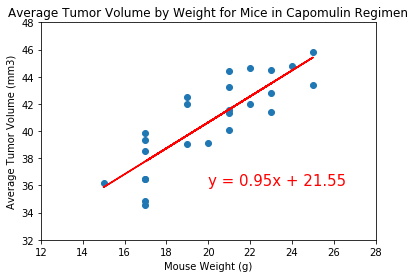

In [24]:
#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_vol)
regress_values = weight * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumor_vol)
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight for Mice in Capomulin Regimen")
plt.xlim(12,28)
plt.ylim(32, 48)
print(f"The r-squared is: {rvalue**2}")
plt.show()